```text
SPDX-License-Identifier: PolyForm-Noncommercial-1.0.0
Autor: Bruno Francisco Barra Atarama
Institución:
  Departamento de Ingeniería Aeroespacial
  Facultad de Ingeniería
  Universidad Nacional de La Plata
Año: 2025
Licencia: PolyForm Noncommercial License 1.0.0
```

**Licencia:** ver [LICENSE](../LICENSE).

# Ejemplo: cinemática en un `.npz`

En este ejemplo se muestra cómo configurar un conjunto de sólidos para simular experimentos a partir de un `.npz` que contenga la información de la cinemática.

Esto puede ser útil, por ejemplo, si normalmente se utiliza otro *software* de desarrollo, como *Matlab*, y solo se utiliza *Python* para simular.

## Bibliotecas y módulos

A continuación, se muestra qué bibliotecas se importan para este ejemplo particular.

El módulo de tipado se recomienda utilizar para aprovechar las ayudas documentadas, sobre todo en los primeros usos.

In [1]:
%matplotlib inline
# Para gráficos interactivos en el notebook. # Para utilizar, instalar ipympl con `pip install ipympl`
# %matplotlib widget    

# Bibliotecas generales
import numpy as np
import matplotlib.pyplot as plt

# Módulos propios

# Funcionales
from src.MP2D import MP2D, cargarMP2D, cargar_resultados
from src import Cinematicas
from src.Importacion import discretizarPerfil

# Tipado
from src import Tipos

## Importación de las cinemáticas

Se cargan las cinemáticas guardadas en `Ejemplos/rec/ala.npz` y `Ejemplos/rec/flap.npz` durante el experimento 3 de [ejemploAlaFlap.ipynb](ejemploAlaFlap.ipynb#experimento-3-simulación-estacionaria-con-desarrollo-temporal), por lo que se simulará lo mismo.

In [2]:
# Se carga la cinemáticaS
cinematicas = [
    Cinematicas.cinematica('npz', {'rutaBase' : 'rec/ala'}),    # `rutaBase` no lleva la extensión.
    Cinematicas.cinematica('npz', {'rutaBase' : 'rec/flap'})    # `rutaBase` no lleva la extensión.
]

## Configuración y simulación

Se configura la instancia de `MP2D` y se simulan los primeros 5 instantes.

In [3]:
cw = 0.508       # Cuerda del perfil principal
cf = 0.2 * cw    # Cuerda del perfil del flap

V = 100     # Velocidad de la avance. Podría ser otra.

refConfig: Tipos.RefConfig = {    # Posicionar el cursor sobre el tipo para más información.
    'l' : cw + cf,
    'V' : V,
    #'rho' : 1.225, # Se completan automáticamente con los valores por defecto, que son los mostrados.
    #'P' : 101325,
}

mpConfig: Tipos.MPConfig= {
    'nombres' : ['Ala', 'Flap'],
    'estacionario' : False,
    'vorticeArranque' : True,
    'rigidez' : 1,
    'mostrarProgreso': True
}

mp = MP2D(cinematicas, mpConfig=mpConfig, refConfig=refConfig)

mp.simular(5)   # Se simulan los primeros cinco instantes.

Simulando: 100%|██████████| 5/5 [00:00<00:00, 12.69 pasos/s]


## Guardado, carga y reanudación de la simulación

El guardado de una instancia `MP2D` actualmente no admite guardar las cinemáticas de los sólidos ni las del vector de toma de momentos, ya que estas son generadores y no son serializables por la biblioteca utilizada.

Pueden tomarse algunas medidas para resolver esto en el caso no aeroelástico durante el guardado, pero eso incrementaría las diferencias entre este y el modo aeroelástico, cuando el escenario de una interrupción de la simulación tampoco se considera altamente probable.

Por eso, el método de carga permite reasignar y sincronizar los generadores de forma sencilla, sobre todo si la cinemática (no aeroelástica) se guardó previamente en un `.npz`, permitiendo la reanudación de las simulaciones pasadas (o iniciar una).

En el caso aeroelástico, esta misma función ejecuta la misma inicialización que la que se lleva a cabo durante la instanciación de un `MP2D`, por lo que también puede retomarse una simulación existente o empezar una.

Simulando: 100%|██████████| 5/5 [00:00<00:00, 12.34 pasos/s]


Cantidad de instantes resueltos: 10

Instantes resueltos: ['0.00000', '0.00003', '0.00006', '0.00009', '0.00011', '0.00014', '0.00017', '0.00020', '0.00023', '0.00026']


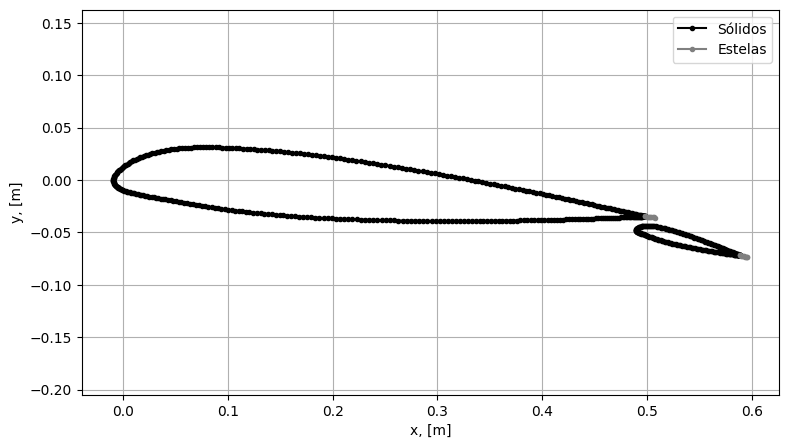

In [4]:
mp.guardar('rec/ejemploAlaFlap')            # Se guarda la instancia
del mp                                  # Se borra la del entorno

# Se carga la cinemáticaS
cinematicas = [
    Cinematicas.cinematica('npz', {'rutaBase' : 'rec/ala'}),    # `rutaBase` no lleva la extensión.
    Cinematicas.cinematica('npz', {'rutaBase' : 'rec/flap'})    # `rutaBase` no lleva la extensión.
]

# Se carga la instancia de MP2D y se regeneran las cinemáticas, sincronizándolas con el último instante resuelto.
mp: MP2D = cargarMP2D('rec/ejemploAlaFlap', cinematicas)

mp.simular(5)   # Se simulan 5 pasos nuevos.

print(f'\nCantidad de instantes resueltos: {len(mp.t)}')
print(f'\nInstantes resueltos: {[f"{t:.5f}" for t in mp.t]}')

fig, ax = plt.subplots(1, 1, figsize=(9, 5))
mp.plotPaneles(-1, mostrarRM=True, ax=ax)
plt.show()

mp.guardar_resultados('rec/ejemploCargaYGuardado', 'mat')

Se puede ver en la figura anterior que el problema resuelto es el mismo. A su vez, en la impresión del bloque de código también se puede ver que la segunda simulación incrementó los instantes resueltos de forma satisfactoria.

## Guardado y carga de la cinemática de las ternas móviles desde un `.csv`

También se puede guardar la cinemática de ternas móviles en archivos `.csv`, para luego reproducir cinemáticas de sólidos como cuerpos rígidos fácilmente.

Para esto se utiliza la misma cinemática almacenada en los `.npz` anteriores.

Simulando: 100%|██████████| 101/101 [00:01<00:00, 53.16 pasos/s]


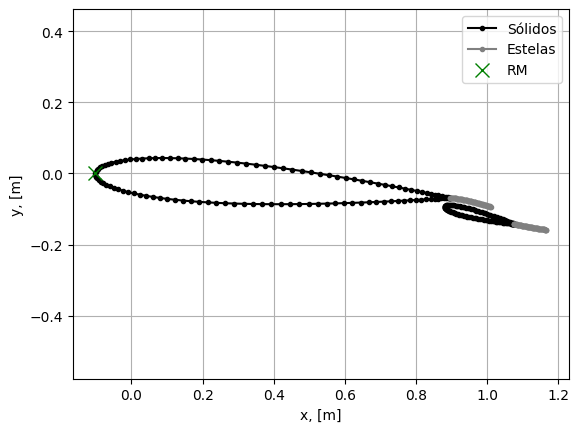

In [5]:
# Se carga las cinemáticas y se guardan las partes de la ternas móviles en formato .csv.
Cinematicas.cinematica('npz', {'rutaBase' : 'rec/ala'}, rutaBase='rec/ala', formatoGuardado='cuerpoRigidoCSV')    # `rutaBase` no lleva la extensión. 
Cinematicas.cinematica('npz', {'rutaBase' : 'rec/flap'}, rutaBase='rec/flap', formatoGuardado='cuerpoRigidoCSV')    # `rutaBase` no lleva la extensión.

# Se generan las cinemáticas a partir de los .csv y las coordenadas del perfil
r_xy = discretizarPerfil('rec/perfiles/NACA0012_selig.txt', 60, 60, 1)
r_xy_flap = discretizarPerfil('rec/perfiles/NACA0012_selig.txt', 60, 60, 0.2)

flapParams: Cinematicas.FlapParams = { # Posicionar el cursor sobre el tipo para más información.
            'cf' : 0.2,
            'cw' : 1,
            'df' : 10,
            'r_xy' : r_xy_flap,
            'h_ROTf_BAf' : 0.24,    # Cantidad adimensionalizada con cf
            'v_ROTf_MCf' : 0.1,     # Cantidad adimensionalizada con cf
            'h_TEw_ROTf' : 0.03,    # Cantidad adimensionalizada con cw
            'v_TEw_ROTf' : 0.054,   # Cantidad adimensionalizada con cw
        }
r_xy_flap = Cinematicas.flap(flapParams)[0]

cinematicas = [
    Cinematicas.cinematica('cuerpoRigidoCSV', {'r_xy' : r_xy, 'rutaBase' : 'rec/ala'}),
    Cinematicas.cinematica('cuerpoRigidoCSV', {'r_xy' : r_xy_flap, 'rutaBase' : 'rec/flap'})
]

# También se genera la cinemática del RM a partir de uno de los .csv
RMParams: Tipos.RMCSVParams = {'rutaBase' : 'rec/ala'}
RM = Cinematicas.RM('csv', RMParams)

# Se instancia el simulador y se simula
mp = MP2D(cinematicas, RM, mpConfig=mpConfig, refConfig=refConfig)
mp.simular()
mp.plotPaneles(-1, mostrarRM=True)
plt.show()